**Step 1: Defining the problem**

**Problem:**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Data from:**
https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view

**Minimum Requirements:**
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


In [ ]:
from google.colab import files
files.upload()

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Data Gathering**


Data Description

House Features

INT_SQFT – The interior Sq. Ft of the property

N_BEDROOM – The number of Bed rooms

N_BATHROOM - The number of bathrooms

N_ROOM – Total Number of Rooms

QS_ROOMS – The quality score assigned for rooms based on buyer reviews

QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews

QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews

QS_OVERALL – The Overall quality score assigned for the property

SALE_COND – The Sale Condition

  Normal: Normal Sale
  
  Abnorml: Abnormal Sale - trade, foreclosure, short sale
  
  AdjLand: Adjoining Land Purchase
  
  Family: Sale between family members
  
  Partial: Home was not completed when last assessed

BUILDTYPE – The type of building

House

  Commercial
  
  Others
  
  Surrounding and Locality

AREA – The property in which the real estate is located

DIST_MAINROAD – The distance of the property to the main road

PARK_FACIL – Whether parking facility is available

UTILITY_AVAIL

  AllPub: All public Utilities (E,G,W,& S)

  NoSewr: Electricity, Gas, and Water (Septic Tank)

  NoSeWa: Electricity and Gas Only

  ELO: Electricity only

STREET

  Gravel
  
  Paved

  No Access

MZZONE
  
  A: Agriculture

  C: Commercial

  I: Industrial

  RH: Residential High Density

  RL: Residential Low Density

  RM: Residential Medium Density

House Sale Price
  
  PRT_ID – The Property Transaction ID assigned by ChennaiEstate

  COMMIS – The Commission paid to the agent

  SALES_PRICE – The total sale price


In [ ]:
df=pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
print(df.columns)

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')


**STEP 3: Data Cleaning**

Checking for NULL:

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

N_BEDROOM - 1 Null value

N_BATHROOM - 5 Null Values

QS_OVERALL - 48 Null values

Handling Null value in N_BEDROOM:

In [ ]:
df[df['N_BEDROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


N_ROOM will help me to predict the value for N_BEDROOM

N_ROOM is 4

Looking for houses that have 4 N_ROOM:

   using groupby to see how many N_BEDROOM are there in houses that have total 4 rooms.

   there 749 1 bedroom and 1813 2 bedroom.

   as we have mostly 2 bedrooms, i fill the empty by 2.

In [ ]:
df[df['N_ROOM']==4]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650
10,P09540,Chrompet,1203,19-10-2006,78,2.0,1.0,4,AdjLand,Yes,...,AllPub,No Access,RM,4.0,3.2,4.5,3.830,403326,119504,14938000
16,P06039,Karapakkam,1639,04-11-2009,175,2.0,2.0,4,Normal Sale,Yes,...,ELO,Gravel,I,2.3,3.2,4.8,3.570,285648,77904,8656000
25,P00293,T Nagar,1685,19-07-2014,105,1.0,1.0,4,Family,No,...,NoSewr,Gravel,RM,2.8,4.4,4.0,3.740,352830,176415,12601080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,P03146,Chrompet,1275,18-05-2011,3,2.0,1.0,4,AbNormal,No,...,ELO,Gravel,RL,3.9,3.8,4.1,3.920,287798,86339,9593250
7098,P00629,Anna Nagar,1611,21-11-2013,144,1.0,1.0,4,Partial,Yes,...,NoSeWa,Paved,RM,3.2,3.7,2.9,3.205,432288,209172,13944780
7100,P05438,T Nagar,1733,24-02-2010,191,1.0,1.0,4,AbNormal,Yes,...,NoSeWa,No Access,RL,3.4,3.7,2.1,2.890,702058,312026,19501600
7103,P05133,Karapakkam,1462,23-04-2010,68,2.0,2.0,4,Family,No,...,NoSeWa,Gravel,RM,2.7,3.3,3.6,3.240,356716,178358,9387250


In [ ]:
rooms=df[df['N_ROOM']==4].groupby(['N_BEDROOM']).count()
rooms

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
N_BEDROOM,,,,,,,,,,,,,,,,,,,,,
1.0,749,749,749,749,749,748,749,749,749,749,...,749,749,749,749,749,749,743,749,749,749
2.0,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,...,1813,1813,1813,1813,1813,1813,1797,1813,1813,1813


Fill na in *N_BEDROOM*

In [ ]:
df['N_BEDROOM'].fillna(value=2, inplace = True)
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


Fill na in *QS_OVERALL*

In [ ]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].mean(), inplace =True)


Fill na in *N_BATHROOM*

In [ ]:
df['N_BATHROOM'].fillna(round(df['N_BATHROOM'].mean()),inplace=True)

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Handled Null values


Dropping Duplicates if any:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

There is no duplicates.

Fixing the Datatypes:

Dropping Columns that are not required:

"PRT_ID","REG_FEE","COMMIS" are not a required column



In [ ]:
df1 = df.drop(["PRT_ID","REG_FEE","COMMIS"], axis="columns") 
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

Coverting from float to int

QS_ROOMS

QS_BATHROOM

QS_BEDROOM

QS_OVERALL

N_BATHROOM

N_BEDROOM

In [ ]:
df1["QS_ROOMS"] = np.floor(pd.to_numeric(df1["QS_ROOMS"])).astype("Int64")
df1["QS_BATHROOM"] = np.floor(pd.to_numeric(df1["QS_BATHROOM"])).astype("Int64")
df1['QS_BEDROOM']=np.floor(pd.to_numeric(df1['QS_BEDROOM'])).astype("Int64")
df1["QS_OVERALL"] = np.floor(pd.to_numeric(df1["QS_OVERALL"])).astype("Int64")
df1["N_BATHROOM"] = np.floor(pd.to_numeric(df1["N_BATHROOM"])).astype("Int64")
df1["N_BEDROOM"] = np.floor(pd.to_numeric(df1["N_BEDROOM"])).astype("Int64")



In [ ]:
df1['DATE_SALE']=df1['DATE_SALE'].astype('datetime64[ns]')
df1['DATE_BUILD']=df1['DATE_BUILD'].astype('datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   Int64         
 5   N_BATHROOM     7109 non-null   Int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   Int64         
 15  QS_BATHROOM    7109 n

Calculating house Age




In [ ]:
df1["DATE_SALE"] = pd.to_datetime(df1["DATE_SALE"])
df1["DATE_BUILD"] = pd.to_datetime(df1["DATE_BUILD"])

In [ ]:
df1["HOUSE_AGE"] = df1["DATE_SALE"]-df1["DATE_BUILD"]
df1["HOUSE_AGE"] = df1["HOUSE_AGE"]/np.timedelta64(1,"Y")
df1["HOUSE_AGE"] = np.round(df1["HOUSE_AGE"])
df1['HOUSE_AGE'] =df1['HOUSE_AGE'].astype(int)

df1["HOUSE_AGE"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    29
7107    31
7108    44
Name: HOUSE_AGE, Length: 7109, dtype: int64

In [ ]:
df1['Year_Built'] =  pd.DatetimeIndex(df1['DATE_BUILD']).year
df1['Year_Sales'] = pd.DatetimeIndex(df1['DATE_SALE']).year

In [ ]:
df1 = df1.drop(["DATE_BUILD","DATE_SALE"], axis=1)
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44,1967,2011
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11,1995,2006
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20,1992,2012
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22,1988,2010
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,7406250,30,1979,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3,2,2,2,5353000,49,1962,2011
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3,4,3,3,10818480,9,1995,2004
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4,4,2,3,8351410,29,1978,2006
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4,3,4,4,8507000,31,1977,2009


In [ ]:
df2 = df1.copy()
df2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44,1967,2011
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11,1995,2006
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20,1992,2012
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22,1988,2010
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,7406250,30,1979,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3,2,2,2,5353000,49,1962,2011
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3,4,3,3,10818480,9,1995,2004
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4,4,2,3,8351410,29,1978,2006
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4,3,4,4,8507000,31,1977,2009


Handling Categorical Data:

--Selected the features with dtype object

--find unique value in each feature

--correct the spelling mistakes


In [ ]:
features = [feature for feature in df2.columns if df2[feature].dtypes == "O"]
features

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [ ]:
for feature in features:
  print("The feature {} Contains unique values such as  = {}".format(feature,(df2[feature].unique())))
  print('')


The feature AREA Contains unique values such as  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

The feature SALE_COND Contains unique values such as  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

The feature PARK_FACIL Contains unique values such as  = ['Yes' 'No' 'Noo']

The feature BUILDTYPE Contains unique values such as  = ['Commercial' 'Others' 'Other' 'House' 'Comercial']

The feature UTILITY_AVAIL Contains unique values such as  = ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

The feature STREET Contains unique values such as  = ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

The feature MZZONE Contains unique values such as  = ['A' 'RH' 'RL' 'I' 'C' 'RM']



In [ ]:
df2['AREA'] = df2.AREA.replace('Karapakam', 'Karapakkam')
df2['AREA'] = df2.AREA.replace('Ann Nagar', 'Anna Nagar')
df2['AREA'] = df2.AREA.replace('Adyr', 'Adyar')
df2['AREA'] = df2.AREA.replace('Velchery', 'Velachery')
df2['AREA'] = df2.AREA.replace('Chrompet', 'Chromepet')
df2['AREA'] = df2.AREA.replace('Chrompt', 'Chromepet')
df2['AREA'] = df2.AREA.replace('Chrmpet', 'Chromepet')
df2['AREA'] = df2.AREA.replace('Chormpet', 'Chromepet')
df2['AREA'] = df2.AREA.replace('TNagar', 'T Nagar')
df2['AREA'] = df2.AREA.replace('Ana Nagar', 'Anna Nagar')
df2['AREA'] = df2.AREA.replace('KKNagar', 'KK Nagar')

In [ ]:
df2['SALE_COND'] = df2.SALE_COND.replace('AbNormal', 'Abnormal')
df2['SALE_COND'] = df2.SALE_COND.replace('Ab Normal', 'Abnormal')
df2['SALE_COND'] = df2.SALE_COND.replace('Partiall', 'Partial')
df2['SALE_COND'] = df2.SALE_COND.replace('PartiaLl', 'Partial')
df2['SALE_COND'] = df2.SALE_COND.replace('Adj Land', 'AdjLand')

In [ ]:
df2['STREET'] = df2['STREET'].replace('Pavd', 'Paved')
df2['STREET'] = df2['STREET'].replace('NoAccess', 'No Access')

In [ ]:
df2["PARK_FACIL"] = df2["PARK_FACIL"].replace(["Noo"],["No"])

In [ ]:
df2['UTILITY_AVAIL'] = df2['UTILITY_AVAIL'].replace('AllPub' , 'All Pub')


In [ ]:
df2['BUILDTYPE'] =df2['BUILDTYPE'].replace('Other','Others')
df2['BUILDTYPE'] =df2['BUILDTYPE'].replace('Comercial','Commercial')


In [ ]:
for feature in features:
  print("The feature is {} and number of categories are  = {}".format(feature,(df2[feature].unique())))
  print('')

The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chromepet' 'KK Nagar'
 'T Nagar']

The feature is SALE_COND and number of categories are  = ['Abnormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']

The feature is PARK_FACIL and number of categories are  = ['Yes' 'No']

The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'House']

The feature is UTILITY_AVAIL and number of categories are  = ['All Pub' 'ELO' 'NoSewr ' 'NoSeWa']

The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access']

The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']



Categorical Data are handled

In [ ]:
df2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
0,Karapakkam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4,3,4,4,7600000,44,1967,2011
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4,4,2,3,21717770,11,1995,2006
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20,1992,2012
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22,1988,2010
4,Karapakkam,1226,84,1,1,3,Abnormal,Yes,Others,All Pub,Gravel,C,3,2,4,3,7406250,30,1979,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3,2,2,2,5353000,49,1962,2011
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3,4,3,3,10818480,9,1995,2004
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4,4,2,3,8351410,29,1978,2006
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4,3,4,4,8507000,31,1977,2009


STEP 4 : DATA VISUALIZATION(EDA)

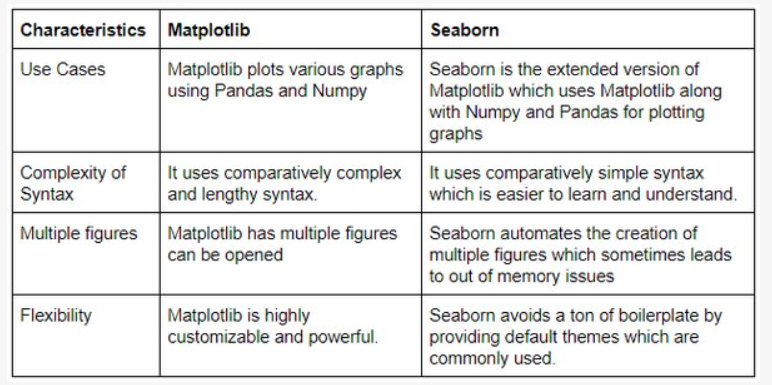

Note:
  -- we have target variable--> SALES_PRICE

Count of houses in a AREA

In [ ]:
df2.groupby("AREA").count().reset_index().sort_values(["INT_SQFT"], ascending=True)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
5,T Nagar,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
0,Adyar,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774
1,Anna Nagar,788,788,788,788,788,788,788,788,788,788,788,788,788,788,788,788,788,788,788
6,Velachery,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981,981
3,KK Nagar,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997
4,Karapakkam,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366
2,Chromepet,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702


Text(0.5, 1.0, 'Count of houses in a AREA')

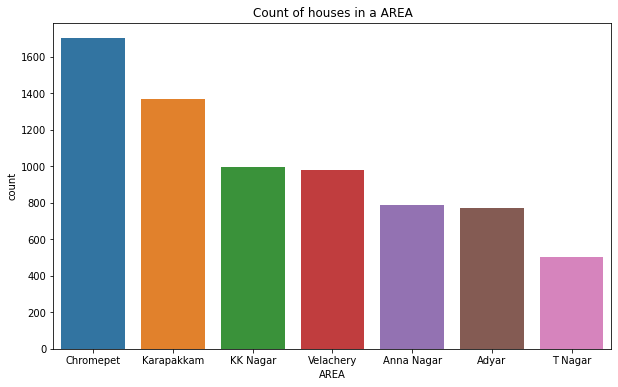

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x ='AREA', data = df2, order=df2['AREA'].value_counts().index)
plt.title('Count of houses in a AREA')

ploting AREA vs SALES_PRICE

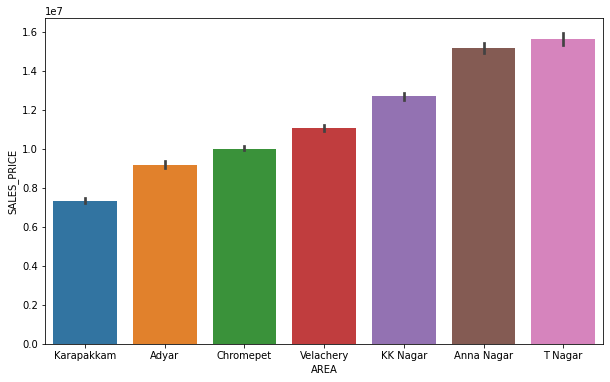

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='AREA', y='SALES_PRICE', data=df2,order=df2.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

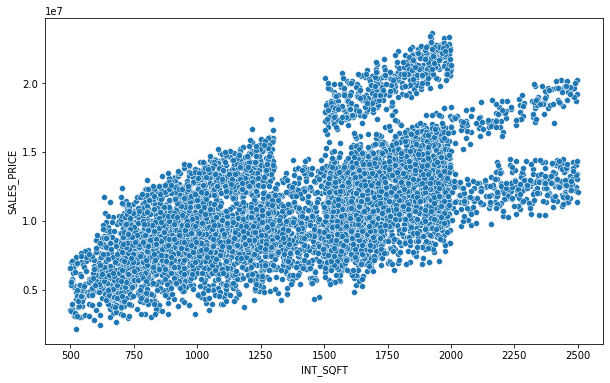

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="INT_SQFT",y="SALES_PRICE",data=df2)

We could see the positive correlation between INT_SQFT and SALES_PRICE

As sqft increases sales price increases

As sqft decreases sales price decreases

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


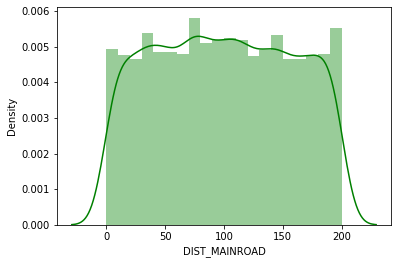

In [ ]:
sns.distplot(df2["DIST_MAINROAD"], color = "green")


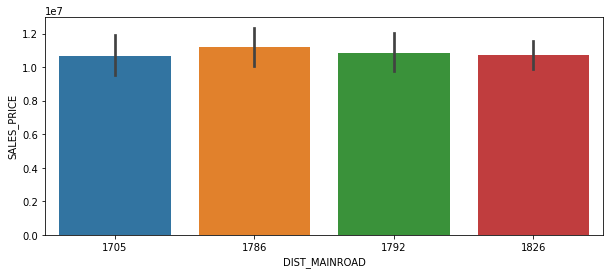

In [ ]:
out = pd.cut(df2['DIST_MAINROAD'], bins=[0, 50, 100, 150, 200], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))

sns.barplot(x=out.value_counts(sort=False), y=df2["SALES_PRICE"])


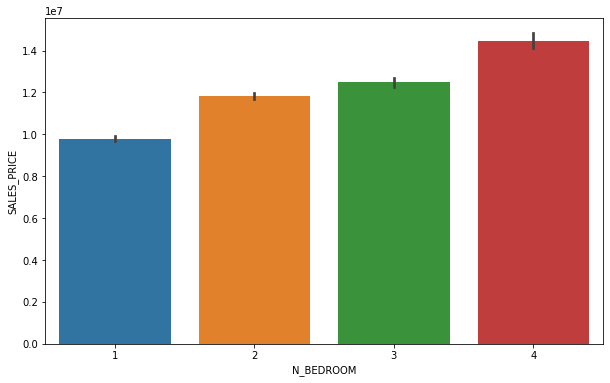

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='N_BEDROOM', y='SALES_PRICE', data=df2, order=df2.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])

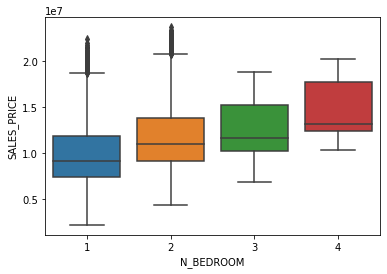

In [ ]:

sns.boxplot(x="N_BEDROOM",
                y="SALES_PRICE",
                data=df2)

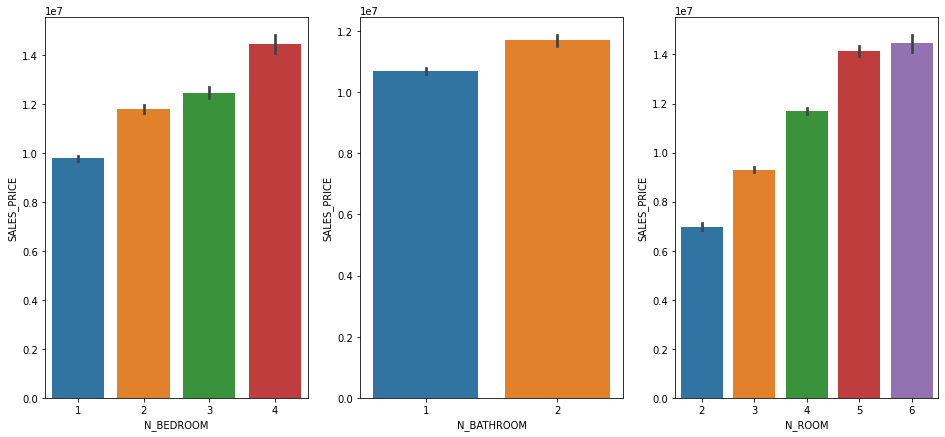

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
sns.barplot(x='N_BEDROOM', y='SALES_PRICE', data=df2,order=df2.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])

plt.subplot(1,3,2)
sns.barplot(x='N_BATHROOM', y='SALES_PRICE', data=df2,order=df2.groupby("N_BATHROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BATHROOM"])

plt.subplot(1,3,3)
sns.barplot(x='N_ROOM', y='SALES_PRICE', data=df2,order=df2.groupby("N_ROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_ROOM"])

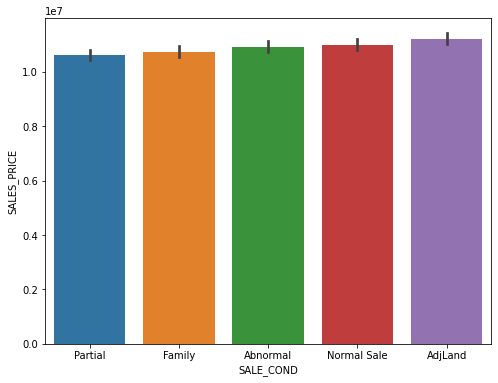

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="SALE_COND", y="SALES_PRICE",data=df2,order=df2.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

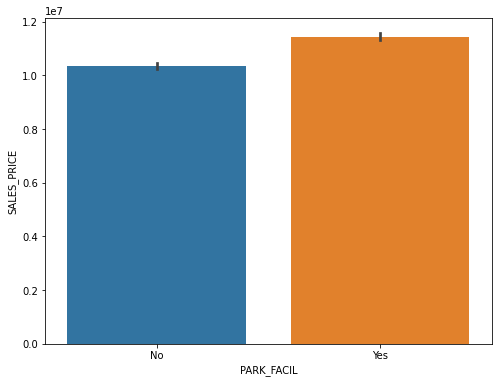

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="PARK_FACIL", y ="SALES_PRICE",data=df2,order=df2.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])


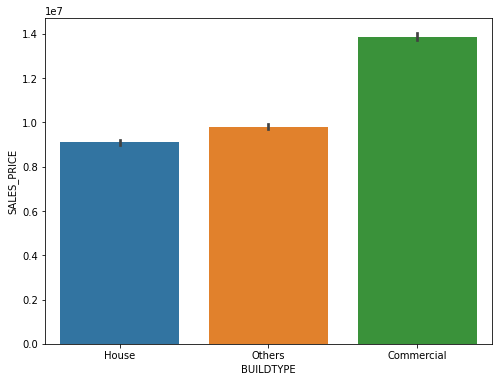

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="BUILDTYPE", y ="SALES_PRICE",data=df2,order=df2.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])

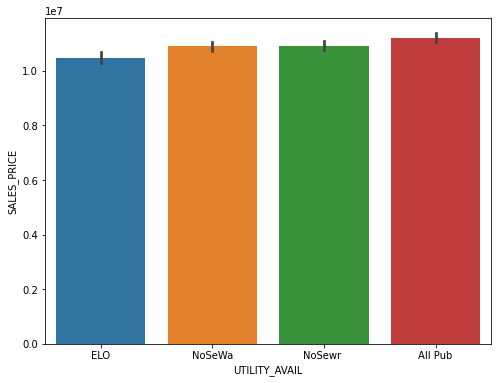

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df2,order=df2.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])


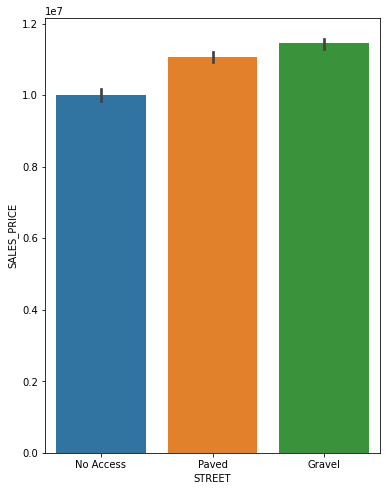

In [ ]:
plt.figure(figsize= (6,8))
sns.barplot(x="STREET",y="SALES_PRICE",data=df2,order=df2.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

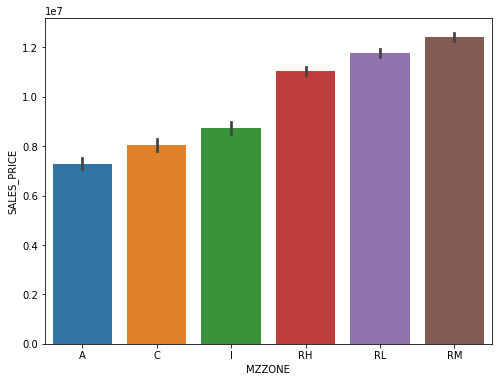

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df2,order=df2.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

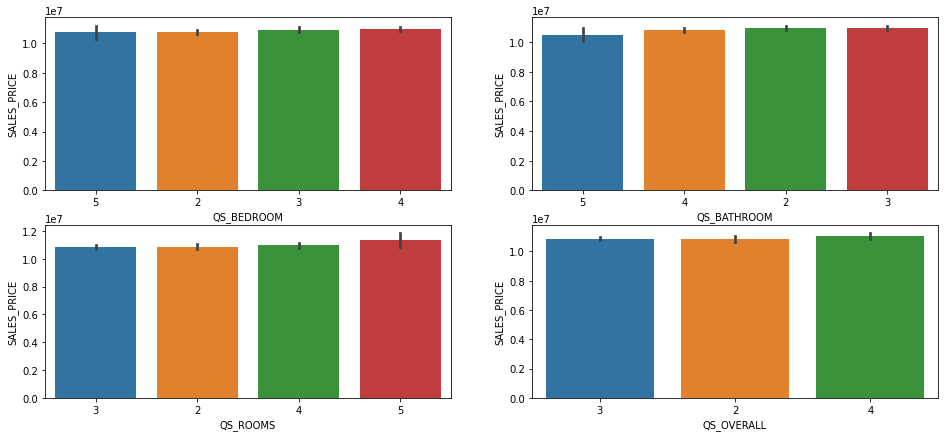

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.barplot(x='QS_BEDROOM', y='SALES_PRICE', data=df2,order=df2.groupby("QS_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["QS_BEDROOM"])

plt.subplot(2,2,2)
sns.barplot(x='QS_BATHROOM', y='SALES_PRICE', data=df2,order=df2.groupby("QS_BATHROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["QS_BATHROOM"])

plt.subplot(2,2,3)
sns.barplot(x='QS_ROOMS', y='SALES_PRICE', data=df2,order=df2.groupby("QS_ROOMS")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["QS_ROOMS"])

plt.subplot(2,2,4)
sns.barplot(x='QS_OVERALL', y='SALES_PRICE', data=df2,order=df2.groupby("QS_OVERALL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["QS_OVERALL"])

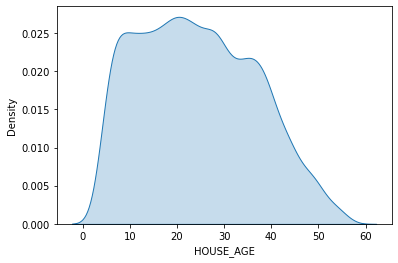

In [ ]:
sns.kdeplot(df2['HOUSE_AGE'],shade=True)

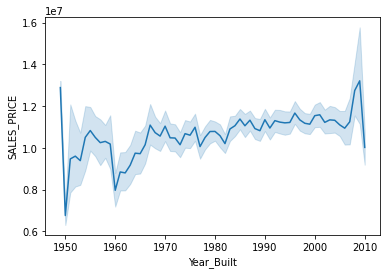

In [ ]:
sns.lineplot(x="Year_Built", y="SALES_PRICE", data=df2)

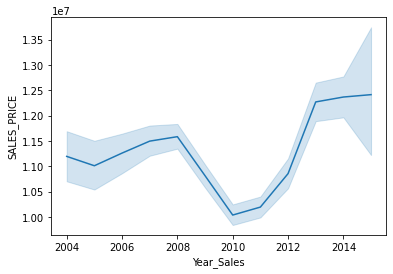

In [ ]:
sns.lineplot(x="Year_Sales", y="SALES_PRICE", data=df2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f789dee8310>,
      dtype=object)

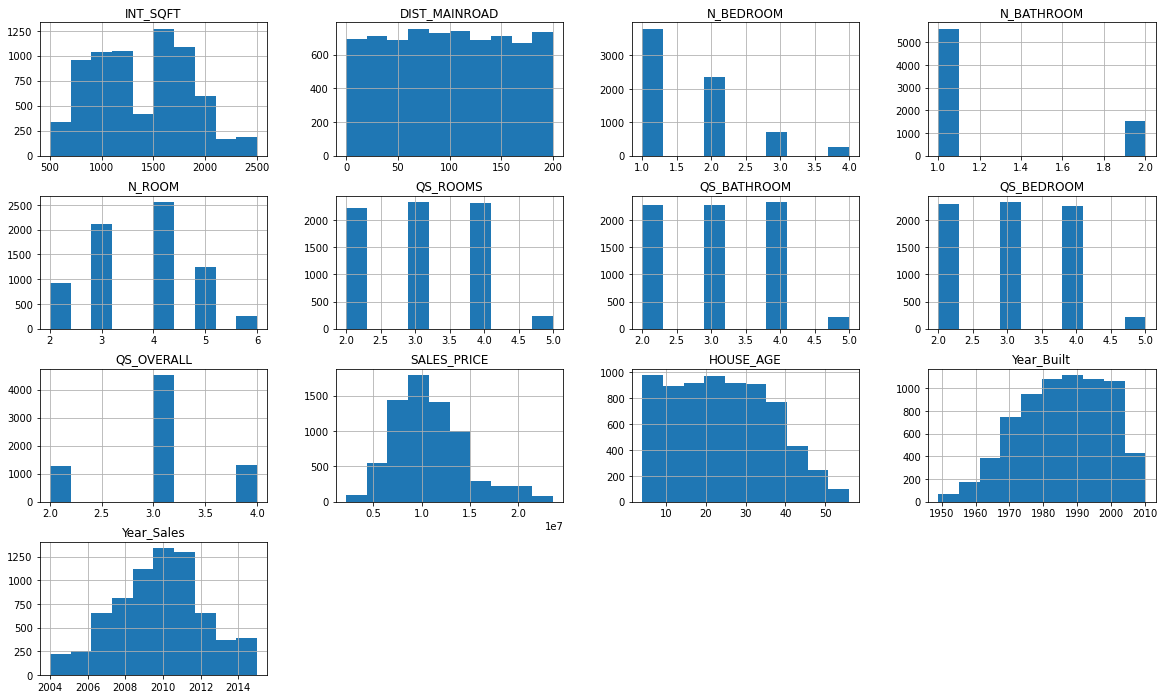

In [ ]:
df2.hist(bins=10,figsize=(20,12))


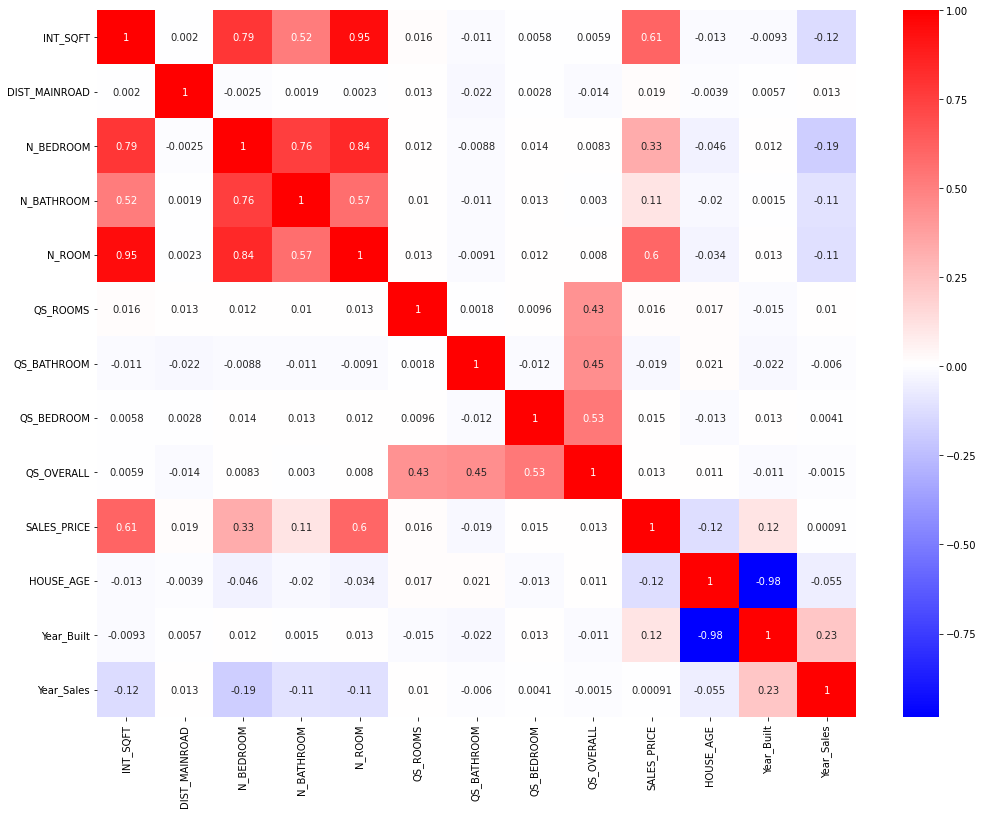

In [ ]:
plt.figure(figsize=(17,13))
sns.heatmap(df2.corr(),cmap="bwr" ,annot=True)

## STEP 5:**LABEL ENCODING**

In [ ]:
df2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
0,Karapakkam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4,3,4,4,7600000,44,1967,2011
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4,4,2,3,21717770,11,1995,2006
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20,1992,2012
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22,1988,2010
4,Karapakkam,1226,84,1,1,3,Abnormal,Yes,Others,All Pub,Gravel,C,3,2,4,3,7406250,30,1979,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3,2,2,2,5353000,49,1962,2011
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3,4,3,3,10818480,9,1995,2004
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4,4,2,3,8351410,29,1978,2006
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4,3,4,4,8507000,31,1977,2009


In [ ]:
df2['AREA'] = df2['AREA'].replace({"Karapakkam":1, "Adyar":2, "Chromepet":3, "Velachery":4, "KK Nagar":5, "Anna Nagar":6, "T Nagar":7})
df2['SALE_COND'] = df2['SALE_COND'].replace({'Abnormal':1, 'Family':2, 'Partial':3, 'AdjLand':4, 'Normal Sale':5})
df2['PARK_FACIL']=df2['PARK_FACIL'].replace({'Yes':1, 'No':0})
df2['BUILDTYPE'] = df2['BUILDTYPE'].replace({'Commercia1':1, 'Others':2, 'House':3})
df2['UTILITY_AVAIL'] = df2['UTILITY_AVAIL'].replace({'All Pub':1, 'ELO':2, 'NoSewr':3, 'NoSeWa':4})
df2['STREET'] = df2['STREET'].replace({'Paved':1, 'Gravel':2, 'No Access':3})
df2['MZZONE'] = df2['MZZONE'].replace({'A':1, 'RH':2, 'RL':3, 'I':4, 'C':5, 'RM':6})

df2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
0,1,1004,131,1,1,3,1,1,Commercial,1,1,1,4,3,4,4,7600000,44,1967,2011
1,6,1986,26,2,1,5,1,0,Commercial,1,2,2,4,4,2,3,21717770,11,1995,2006
2,2,909,70,1,1,3,1,1,Commercial,2,2,3,4,3,2,3,13159200,20,1992,2012
3,4,1855,14,3,2,5,2,0,2,NoSewr,1,4,4,3,3,4,9630290,22,1988,2010
4,1,1226,84,1,1,3,1,1,2,1,2,5,3,2,4,3,7406250,30,1979,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1,1,2,4,0,2,2,3,6,3,2,2,2,5353000,49,1962,2011
7105,4,1897,52,3,2,5,2,1,2,4,3,2,3,4,3,3,10818480,9,1995,2004
7106,4,1614,152,2,1,4,5,0,3,4,2,4,4,4,2,3,8351410,29,1978,2006
7107,1,787,40,1,1,2,3,1,Commercial,2,1,3,4,3,4,4,8507000,31,1977,2009


In [ ]:
df2.head(10)



,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Year_Built,Year_Sales
0,1,1004,131,1,1,3,1,1,Commercial,1,1,1,4,3,4,4,7600000,44,1967,2011
1,6,1986,26,2,1,5,1,0,Commercial,1,2,2,4,4,2,3,21717770,11,1995,2006
2,2,909,70,1,1,3,1,1,Commercial,2,2,3,4,3,2,3,13159200,20,1992,2012
3,4,1855,14,3,2,5,2,0,2,NoSewr,1,4,4,3,3,4,9630290,22,1988,2010
4,1,1226,84,1,1,3,1,1,2,1,2,5,3,2,4,3,7406250,30,1979,2009
5,3,1220,36,2,1,4,3,0,Commercial,4,3,2,4,2,3,3,12394750,5,2009,2014
6,3,1167,137,1,1,3,3,0,2,1,3,3,3,2,2,2,8488790,27,1979,2007
7,4,1847,176,3,2,5,2,0,Commercial,1,2,6,2,4,2,3,16800250,10,1996,2006
8,3,771,175,1,1,2,4,0,2,NoSewr,1,6,2,3,4,3,8308970,34,1977,2011
9,4,1635,74,2,1,4,1,0,2,2,3,4,3,3,3,3,8083650,15,1991,2006


Fixing Label Encoding Conflicts:
  Some of the values are not mapped properly. So finding the unique values in categorical columns and fixing it.

In [ ]:
df2['AREA'].unique()

array([1, 6, 2, 4, 3, 5, 7])

In [ ]:
df2['SALE_COND'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
df2['PARK_FACIL'].unique()

array([1, 0])

In [ ]:
df2['BUILDTYPE'].unique() 

array(['Commercial', 2, 3], dtype=object)

In [ ]:
df2['BUILDTYPE'] = df2['BUILDTYPE'].replace({'Commercial':1})

In [ ]:
df2['BUILDTYPE'].unique() 

array([1, 2, 3])

In [ ]:
df2['UTILITY_AVAIL'].unique() 

array([1, 2, 'NoSewr ', 4], dtype=object)

In [ ]:
df2['UTILITY_AVAIL'] = df2['UTILITY_AVAIL'].replace({'NoSewr ':3})

In [ ]:
df2['UTILITY_AVAIL'].unique() 

array([1, 2, 3, 4])

In [ ]:
df2['STREET'].unique() 

array([1, 2, 3])

In [ ]:
df2['MZZONE'].unique() 

array([1, 2, 3, 4, 5, 6])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7109 non-null   int64
 1   INT_SQFT       7109 non-null   int64
 2   DIST_MAINROAD  7109 non-null   int64
 3   N_BEDROOM      7109 non-null   Int64
 4   N_BATHROOM     7109 non-null   Int64
 5   N_ROOM         7109 non-null   int64
 6   SALE_COND      7109 non-null   int64
 7   PARK_FACIL     7109 non-null   int64
 8   BUILDTYPE      7109 non-null   int64
 9   UTILITY_AVAIL  7109 non-null   int64
 10  STREET         7109 non-null   int64
 11  MZZONE         7109 non-null   int64
 12  QS_ROOMS       7109 non-null   Int64
 13  QS_BATHROOM    7109 non-null   Int64
 14  QS_BEDROOM     7109 non-null   Int64
 15  QS_OVERALL     7109 non-null   Int64
 16  SALES_PRICE    7109 non-null   int64
 17  HOUSE_AGE      7109 non-null   int64
 18  Year_Built     7109 non-null   int64
 19  Year_S

In [ ]:
df2.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'HOUSE_AGE', 'Year_Built', 'Year_Sales'],
      dtype='object')

## STEP 6 : Data Spliting

In [ ]:
x=df2[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'HOUSE_AGE', 'Year_Built', 'Year_Sales']].values
y=df2.SALES_PRICE.values

In [ ]:
x

array([[1, 1004, 131, ..., 44, 1967, 2011],
       [6, 1986, 26, ..., 11, 1995, 2006],
       [2, 909, 70, ..., 20, 1992, 2012],
       ...,
       [4, 1614, 152, ..., 29, 1978, 2006],
       [1, 787, 40, ..., 31, 1977, 2009],
       [4, 1896, 156, ..., 44, 1961, 2005]], dtype=object)

In [ ]:
y

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
x_train.shape, x_test.shape

((5687, 19), (1422, 19))

In [ ]:
y_train.shape, y_test.shape

((5687,), (1422,))

### **STEP 7: Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
x_train_scaled

array([[-0.29007265, -0.49302463,  1.01905309, ...,  0.77466648,
        -0.73692549,  0.55795052],
       [ 1.33519153,  0.88380421,  0.84473573, ...,  1.01793591,
        -1.21020558, -0.79709486],
       [-1.3735821 , -1.73872691, -1.09018695, ..., -0.60386029,
         0.6829148 ,  0.55795052],
       ...,
       [-0.83182737, -0.77713217, -0.93330133, ...,  0.125948  ,
        -0.26364539, -0.34541307],
       [-0.83182737, -0.67441637, -0.58466661, ..., -1.4958482 ,
         1.39283494, -0.34541307],
       [ 0.25168208,  0.75267765,  1.35025607, ...,  0.53139705,
        -0.57916546, -0.34541307]])

### **STEP 8: Data Modelling**

Target Outcome(SALES_PRICE) is given. So we are using **Supervised Learning**

Target outcome is a continuous variable so we are going use **Regression models**

**MODEL 1: Linear Regression**

Linear regression is used for finding linear relationship between target and one or more predictors.

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible.

Error is the distance between the point to the regression line.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'HOUSE_AGE', 'Year_Built', 'Year_Sales'], columns=['Coefficient'])
y_pred = regressor.predict(x_test_scaled)
coeff_df

,Coefficient
AREA,1.510278e+06
INT_SQFT,3.203213e+05
DIST_MAINROAD,1.637900e+04
N_BEDROOM,-1.246636e+06
N_BATHROOM,2.066121e+05
N_ROOM,1.866052e+06
SALE_COND,1.028275e+05
PARK_FACIL,5.196462e+05
BUILDTYPE,-1.872162e+06
UTILITY_AVAIL,-1.074574e+05


In [ ]:
y_pred

array([16648403.61745203,  5738854.63181732,  5830464.68798226, ...,
        6422359.33592569,  8062362.25613449,  9503480.29382111])

In [ ]:
df_lr=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df_lr

,Actual,Predicted
0,18543840,1.664840e+07
1,7049500,5.738855e+06
2,7660600,5.830465e+06
3,14090500,1.436248e+07
4,6576375,7.362699e+06
...,...,...
1417,9184130,9.799523e+06
1418,16686780,1.670903e+07
1419,6505500,6.422359e+06
1420,9396600,8.062362e+06


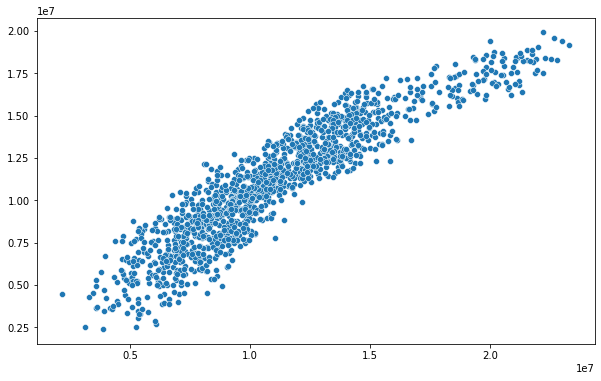

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, data=df_lr)
plt.show()

In [ ]:
from sklearn import metrics
print("Linear regression prediction: ")
print("R2-Score :",metrics.r2_score(y_test, y_pred))

Linear regression prediction: 
R2-Score : 0.8489322293622406


**MODEL 2: Decision Tree**

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Instantiate dt
dt = DecisionTreeRegressor()
# Fit dt to the training set
dt.fit(x_train_scaled,y_train)
y_pred_dt=dt.predict(x_test_scaled)
print(y_test,y_pred_dt)

[18543840  7049500  7660600 ...  6505500  9396600  9225240] [18428120.  7637750.  8052400. ...  6972000.  9632875.  9524740.]


In [ ]:
df_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df_dt

,Actual,Predicted
0,18543840,18428120.0
1,7049500,7637750.0
2,7660600,8052400.0
3,14090500,13638900.0
4,6576375,5807250.0
...,...,...
1417,9184130,8567050.0
1418,16686780,17359980.0
1419,6505500,6972000.0
1420,9396600,9632875.0


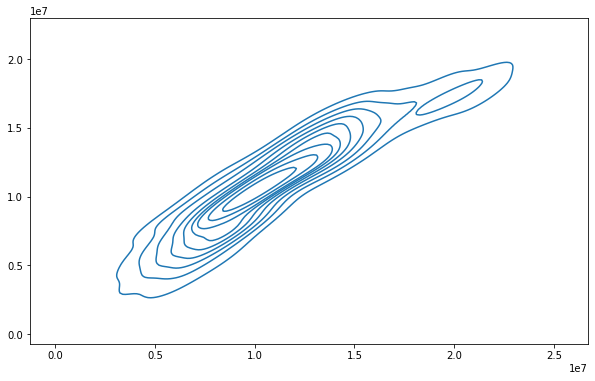

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(x=y_test, y=y_pred, data=df_dt)


In [ ]:
from sklearn import metrics
print("DECISION TREE REGRESSION: ")

print("R2-Score :",metrics.r2_score(y_test, y_pred_dt))

DECISION TREE REGRESSION: 
R2-Score : 0.9655523937079322


MODEL 3: Gradient Boost

Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.

As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for kr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model3= GradientBoostingRegressor(learning_rate=kr)
  model3.fit(x_train_scaled, y_train)
  print("Learning rate : ", kr, " Train score : ", model3.score(x_train_scaled,y_train), " Test score : ", model3.score(x_test_scaled,y_test))

Learning rate :  0.01  Train score :  0.7357967118681659  Test score :  0.7288354836933939
Learning rate :  0.05  Train score :  0.9672365558353279  Test score :  0.9644035069719112
Learning rate :  0.1  Train score :  0.9885594005421436  Test score :  0.986616696242851
Learning rate :  0.3  Train score :  0.997500875104836  Test score :  0.9966080821545464
Learning rate :  0.5  Train score :  0.9973741444293304  Test score :  0.9965447203243992
Learning rate :  0.8  Train score :  0.9982285966492178  Test score :  0.9971480236632839
Learning rate :  1  Train score :  0.9978835503909285  Test score :  0.9960711476722257


Model 4: XgBoost

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for sr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model4 = xgb.XGBRegressor(learning_rate = sr, n_estimators=100, verbosity = 0) # initialise the model
  model4.fit(x_train_scaled,y_train) #train the model
  model4.score(x_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", sr, " Train score : ", model4.score(x_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model4, x_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.39112253518193785  Cross-Val score :  -0.3975385771581011
Learning rate :  0.02  Train score :  0.7345861664292903  Cross-Val score :  0.7307733053135909
Learning rate :  0.03  Train score :  0.912846521344679  Cross-Val score :  0.9102421072352817
Learning rate :  0.04  Train score :  0.9532666709098938  Cross-Val score :  0.9503800152800659
Learning rate :  0.05  Train score :  0.9670997451708895  Cross-Val score :  0.9644021825859135
Learning rate :  0.1  Train score :  0.9885392023116317  Cross-Val score :  0.9869266423458155
Learning rate :  0.11  Train score :  0.9899904936809014  Cross-Val score :  0.9885740554815768
Learning rate :  0.12  Train score :  0.9916316931040438  Cross-Val score :  0.9899536999160639
Learning rate :  0.13  Train score :  0.9928959761461754  Cross-Val score :  0.991327377294714
Learning rate :  0.14  Train score :  0.9933461781359981  Cross-Val score :  0.9922908923403556
Learning rate :  0.15  Train score :  0.

## **Evaluation metrics of all models constructed**

The r2 score of Linear Regression model is : 0.8489322293622406

The r2 score of Decision tree Regressor model is : 0.9655523937079322

The cross validation score of Gradient Boost regressor model: 0.9971480236632839

The cross validation score of an XG_Boost regessor model is :0.9968851908777043

**We can infer from the above models that XGBOOST performs well for prediction with 99.6% compared to other models**

### **Answers to Buyers**

Price of the property changes due to various factors. Top factors are:
Based on whether the property is Commercial,others or House
Based on the location of the property.
The price changes also on Availability of Parking.
Finally based on the Zone which the property belongs to
Suggestions to Real estate agents

### **Profit can be increased by considering the following factors:**
It is recommended to construct a commercial bulding rather than residential or others.
Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.
It is highly recommended to construct buildings with Parking Facility.
The Street of property should be Paved and it should have All Public facilites nearby.